In [1]:
# script to make plots for low mass sample validation


import ROOT as rt
import csv
import re
import sys
import collections
import os
from collections import OrderedDict
import uproot
import pandas as pd
from root_numpy import array2tree


import scipy
import awkward
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
sys.path.append('/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/lib/')
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot
from helper_functions import deltaR, deltaPhi
import numpy as np
from scipy.stats import norm
import math
import CMS_lumi, tdrstyle
a= tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 0

wH = 1
Z_MASS = 91.2



# donotdelete = []
print(sys.version)

Welcome to JupyROOT 6.18/02
3.6.8 (default, Aug  7 2019, 17:28:10) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


# Load ntuples

In [2]:
fpath =OrderedDict()
tree = OrderedDict()


start_t = time.time()
data_year = 'full'

v1 = 'V1p17'


v2 = '/v5/v163/'



old_ctau = {
    'STodd_ms3p0':[100],
    'SToEE_ms0p4':[10],
    'SToGammaGamma_ms0p4':[10,50],
    'SToKPlusKMinus_ms1p5':[187],
    'SToK0K0_ms1p5':[187],
    'SToPi0Pi0_ms0p4':[10],
    'SToPi0Pi0_ms1p0':[125],
    'SToPiPlusPiMinus_ms0p4':[10,50],
    'SToPiPlusPiMinus_ms1p0':[125],
    'STodd_ms7':[1000],
    'STodd_ms15':[1000],
    'STodd_ms40':[1000],
    'STodd_ms55':[1000],
    'SToTauTau_ms7':[1000],
    'SToTauTau_ms15':[1000],
    'SToTauTau_ms40':[1000],
    'SToTauTau_ms55':[1000],
#     'SToBB_ms15':[1000],
#     'SToBB_ms40':[1000],
#     'SToBB_ms55':[1000],
}





ntupler_version = 'V1p17/'
mc_path = {}
analyzer_version = 'v1/v163/'
mc_central_path = '/storage/af/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/'+ntupler_version+'/MC_all/'+analyzer_version+'/normalized/'
analyzer_version = 'v2/v163/'
mc_private_path = '/storage/af/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/'+ntupler_version+'/MC_Fall18/'+analyzer_version+'/normalized/'
p = 'ggH'
for k in old_ctau.keys():
    for ct in old_ctau[k]:

        key = 'MC_'+p+'_'+k + '_'+str(ct)
        if (p == 'ggH' or p == 'VBFH') and ('ms7' in k or 'ms15' in k or 'ms40' in k or 'ms55' in k) and not (p =='VBFH' and 'dd' in k):
            mass = k[k.find('ms')+2:]
            if 'dd' in k and p == 'ggH':fpath[key] = mc_central_path+p+'_HToSSTodddd_MH-125_MS-'+mass+'_ctau-'+str(ct)+'_137000pb_weighted.root'
            elif 'BB' in k and p =='ggH':fpath[key] = mc_central_path+p+'_HToSSTobbbb_MH-125_MS-'+mass+'_ctau-'+str(ct)+'_137000pb_weighted.root'
            elif 'BB' in k and p =='VBFH':fpath[key] = mc_central_path+p+'_HToSSTo4b_MH-125_MS-'+mass+'_ctau-'+str(ct)+'_137000pb_weighted.root'
            else:fpath[key] = mc_central_path+p+'_HToSSTo4Tau_MH-125_MS-'+mass+'_ctau-'+str(ct)+'_137000pb_weighted.root'
        else:

            if 'ggH' in p or 'ttH' in p: fpath[key] = mc_private_path+p+'_HToSS_'+k+'_pl'+str(ct)+'_137000pb_weighted.root'
            elif p == 'VBFH' or p=='ZH' or p == 'WH': fpath[key] = mc_private_path+p+'ToSS_'+k+'_pl'+str(ct)+'_137000pb_weighted.root'
            elif 'ggZH' in p:fpath[key] = mc_private_path+'ZHToSS_'+k+'_pl'+str(ct)+'_137000pb_weighted.root'
        if not os.path.exists(fpath[key]):print(key, fpath[key])
            


NEvents = {}
for k,v in fpath.items():
    print (k, v)
    root_dir = uproot.open(v) 

    tree[k] = root_dir['MuonSystem']
    NEvents[k] = root_dir['NEvents'][1]
    a = tree[k]["weight"].array()
    print("NEvents",NEvents[k])
    # 22743688.0


MC_ggH_STodd_ms3p0_100 /storage/af/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17//MC_Fall18/v2/v163//normalized/ggH_HToSS_STodd_ms3p0_pl100_137000pb_weighted.root
NEvents 17414186.0
MC_ggH_SToEE_ms0p4_10 /storage/af/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17//MC_Fall18/v2/v163//normalized/ggH_HToSS_SToEE_ms0p4_pl10_137000pb_weighted.root
NEvents 21020228.0
MC_ggH_SToGammaGamma_ms0p4_10 /storage/af/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17//MC_Fall18/v2/v163//normalized/ggH_HToSS_SToGammaGamma_ms0p4_pl10_137000pb_weighted.root
NEvents 25255410.0
MC_ggH_SToGammaGamma_ms0p4_50 /storage/af/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17//MC_Fall18/v2/v163//normalized/ggH_HToSS_SToGammaGamma_ms0p4_pl50_137000pb_weighted.root
NEvents 25700114.0
MC_ggH_SToKPlusKMinus_ms1p5_187 /storage/af/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17//MC_Fall18/v2/v163//normalized/ggH_HToSS_SToKPlusKMinus_

# load variables

In [21]:

JET_PT_CUT = 10.0
MUON_PT_CUT = 20.0
N_RECHIT_CUT = 90
jetPt_cut = 50
tightid = False
ring_cut = 50

cut_based = True
cut_based_version = 'v4'

intime = True
DPHI_CUT = 1


gLLP_csc = {}

nCscClusters = {}
selections_cluster = {}
sel_cluster = {}
sel_jetveto = {}
met_trigger = {}
met = {}
gLLP_beta = {}
jetPt = {}
jetPhi = {}
metPhi = {}
angle ={}
nLeptons = {}
genJetPt = {}
genJetPhi = {}
genMet = {}
genMetPhi = {}
pileupWeight = {}
gLLP_ctau = {}
npv = {}
nRechitClusters = {}
nJets = {}
nJets_50gev = {}
nCscRings = {}
nDtRings = {}

weight = {}
jetMet_dPhiMin = {}
dphiMet_cluster = {}
nRechits_sr = {}
jetMet_dPhiMin30_sr = {}
cscClusterTimeSpread = {}
bdt_score = {}
nCscChambers = {}
a = {}
b = {}
c = {}
d = {}
sel_ev = {}
cluster_index = ''
nRings = {}
cscRechitClusterJetVetoPt = {}
cscClusterSize = {}
cscRechitClusterTime = {}
cscRechitClusterTimeSpread = {}
cscRechitClusterDphi = {}
cscRechitClusterMe11Ratio = {}
cscRechitClusterEta = {}
cscRechitClusterPhi = {}
cscRechitClusterMuonVetoGlobal = {}
cscRechitClusterGlobalMuonVetoPt = {}
cscRechitClusterMuonVetoPt = {}
cscRechitClusterTimeSpreadWeightedAll = {}
dtRechitClusterAvgStation = {}
cscRechitClusterAvgStation = {}
clusterDphi = {}
cscRechitClusterAvgStation = {}
dtRechitClusterJetVetoPt = {}
dtRechitCluster_match_RPChits_dPhi0p5 = {}
dtRechitClusterDphi = {}
dtRechitClusterMB1Ratio = {}
dtRechitClusterSize = {}
dtRechitClusterMuonVetoLooseId = {}
dtRechitClusterMuonVetoPt = {}
dtRechitClusterAvgStation = {}
dtRechitClusterLooseIdMuonVetoPt = {}
dtRechitClusterMuonVetoLooseId = {} 
deltaEta = {}        
deltaRCluster = {}
dtRechitClusterDphi = {}
dtRechitClusterEta = {}
dtRechitClusterPhi = {}
dtRechitClusterNStation = {}
dtRechitClusterStationRatio = {}
metPhi = {}
nCscClusters = {}
evtNum = {}
runNum = {}
lumiNum = {}
nDtSectors = {}
nDtStations= {}
nDtWheels= {}
nDTRechitsNoiseSec8= {}
nDTRechitsNoiseSec9= {}
nDTRechitsNoiseSec10= {}
nTotalDtNoiseHits = {}
cscRechitClusterTimeSpreadWeighted = {}
cscRechitClusterTimeWeighted = {}
deltaEta = {}
category = 0
#2csc, 2dt, 1csc+1dt
for k, T in tree.items():
#     if not k == 'data' and not k[-4:] == '1000' and not 'Pi' in k:continue
    print(k)
########### SELECTION: CLUSTERS ############
    if k == 'data':sel_csccluster = T.array('cscRechitCluster' + cluster_index + 'JetVetoPt')>=0
    else: sel_csccluster = np.logical_and(T.array('cscRechitCluster' + cluster_index + '_match_gLLP_minDeltaR')<0.4, \
                                    T.array('cscRechitCluster' + cluster_index + '_match_gLLP_csc'))
    
    if k == 'data':sel_dtcluster = T.array('dtRechitCluster_match_RPChits_dPhi0p5')>=0
    else: sel_dtcluster = np.logical_and(T.array('dtRechitCluster_match_gLLP_dt'), T.array('dtRechitCluster_match_gLLP_minDeltaR')<0.4)

########### SELECTION: JETS ############
    
    sel_jet = np.logical_and(T.array('jetPt') > 30, np.abs(T.array('jetEta')) < 2.4 )
    sel_jet = np.logical_and(T.array('jetTightPassId'), sel_jet)



########### SELECTION: EVENTS ############
    hlt = T['HLTDecision'].array()
    sel_ev[k] = T.array('METNoMuTrigger')
    sel_ev[k] = np.logical_and(sel_ev[k], (T.array('nDtRings')+T.array('nCscRings'))<10)
    sel_ev[k] = np.logical_and(sel_ev[k] ,T.array('metEENoise') > 200)
    sel_ev[k] = np.logical_and(sel_ev[k] , sel_jet.sum()>=1)
    sel_ev[k] = np.logical_and(sel_ev[k],T.array('Flag2_all'))
    
    nCscClusters[k] = sel_csccluster.sum()[sel_ev[k]]
    if category == 0:
        sel_ev[k]  = np.logical_and(sel_ev[k],sel_csccluster.sum() >= 2)
#         sel_ev[k]  = np.logical_and(sel_ev[k],sel_dtcluster.sum() == 0)
    elif category == 1:
        sel_ev[k]  = np.logical_and(sel_ev[k],sel_dtcluster.sum() >= 2)
#         sel_ev[k]  = np.logical_and(sel_ev[k],sel_csccluster.sum() == 0)
    else:
        sel_ev[k]  = np.logical_and(sel_ev[k],sel_csccluster.sum() == 1)
        sel_ev[k]  = np.logical_and(sel_ev[k],sel_dtcluster.sum() == 1)    
########### BRANCHES ############

   ##### event variables ##### 
    
    gLLP_beta[k] = T.array('gLLP_beta')[sel_ev[k]]
   
    
   
    if category == 0:

        cscRechitClusterJetVetoPt[k] = T.array('cscRechitCluster' + cluster_index + 'JetVetoPt')[sel_csccluster][sel_ev[k]][:,:]
        cscRechitClusterGlobalMuonVetoPt[k] = T.array('cscRechitCluster' + cluster_index + 'MuonVetoPt')[sel_csccluster][sel_ev[k]][:,:]
        cscRechitClusterMuonVetoGlobal[k] = T.array('cscRechitCluster' + cluster_index + 'MuonVetoGlobal')[sel_csccluster][sel_ev[k]][:,:]

        cscRechitClusterGlobalMuonVetoPt[k][np.logical_not(cscRechitClusterMuonVetoGlobal[k])] = 0.0
        cscRechitClusterMuonVetoPt[k] = T.array('cscRechitCluster' + cluster_index + 'MuonVetoPt')[sel_csccluster][sel_ev[k]][:,:]

        
        cscClusterSize[k] =  T.array('cscRechitCluster' + cluster_index + 'Size')[sel_csccluster][sel_ev[k]][:,:]
        cscRechitClusterTime[k] =  T.array('cscRechitCluster' + cluster_index + 'TimeTotal')[sel_csccluster][sel_ev[k]][:,:]
        cscRechitClusterTimeWeighted[k] =  T.array('cscRechitCluster' + cluster_index + 'TimeWeighted')[sel_csccluster][sel_ev[k]][:,:]
        cscRechitClusterTimeSpread[k] =  T.array('cscRechitCluster' + cluster_index + 'TimeSpread')[sel_csccluster][sel_ev[k]][:,:]
        cscRechitClusterTimeSpreadWeighted[k] =  T.array('cscRechitCluster' + cluster_index + 'TimeSpreadWeighted')[sel_csccluster][sel_ev[k]][:,:]
        cscRechitClusterTimeSpreadWeightedAll[k] =  T.array('cscRechitCluster' + cluster_index + 'TimeSpreadWeightedAll')[sel_csccluster][sel_ev[k]][:,:]

        
        cscRechitClusterDphi[k] =  T.array('cscRechitCluster' + cluster_index + 'MetEENoise_dPhi')[sel_csccluster][sel_ev[k]][:,:]
        cscRechitClusterMe11Ratio[k] =  T.array('cscRechitCluster' + cluster_index + 'Me11Ratio')[sel_csccluster][sel_ev[k]]  
        cscRechitClusterEta[k] =  T.array('cscRechitCluster' + cluster_index + 'Eta')[sel_csccluster][sel_ev[k]]  
        cscRechitClusterPhi[k] =  T.array('cscRechitCluster' + cluster_index + 'Phi')[sel_csccluster][sel_ev[k]]  
        cscRechitClusterAvgStation[k] =  T.array('cscRechitCluster' + cluster_index + 'AvgStation10')[sel_csccluster][sel_ev[k]]  
        clusterDphi[k] = deltaPhi(T.array('cscRechitClusterPhi')[sel_csccluster][sel_ev[k]][:,0], \
                                         T.array('cscRechitClusterPhi')[sel_csccluster][sel_ev[k]][:,1])
        deltaEta[k] = T.array('cscRechitClusterEta')[sel_csccluster][sel_ev[k]][:,0]-T.array('cscRechitClusterEta')[sel_csccluster][sel_ev[k]][:,1]
        deltaRCluster[k] = deltaR(T.array('cscRechitClusterEta')[sel_csccluster][sel_ev[k]][:,0], T.array('cscRechitClusterPhi')[sel_csccluster][sel_ev[k]][:,0],\
                                  T.array('cscRechitClusterEta')[sel_csccluster][sel_ev[k]][:,1], T.array('cscRechitClusterPhi')[sel_csccluster][sel_ev[k]][:,1])
        nCscClusters[k] = sel_csccluster.sum()[sel_ev[k]]
        
    elif category == 1:
        dtRechitClusterJetVetoPt[k] = T.array('dtRechitClusterTightJetVetoPt')[sel_dtcluster][sel_ev[k]][:,:]
        
        dtRechitCluster_match_RPChits_dPhi0p5[k] = T.array('dtRechitCluster_match_RPChits_dPhi0p5')[sel_dtcluster][sel_ev[k]][:,:]
        dtRechitClusterSize[k] =  T.array('dtRechitClusterSize')[sel_dtcluster][sel_ev[k]][:,:]
        dtRechitClusterEta[k] =  T.array('dtRechitClusterEta')[sel_dtcluster][sel_ev[k]][:,:]
        dtRechitClusterPhi[k] =  T.array('dtRechitClusterPhi')[sel_dtcluster][sel_ev[k]][:,:]
        dtRechitClusterAvgStation[k] =  T.array('dtRechitClusterAvgStation10')[sel_dtcluster][sel_ev[k]][:,:]
        dtRechitClusterDphi[k] =  T.array('dtRechitCluster' + cluster_index + 'MetEENoise_dPhi')[sel_dtcluster][sel_ev[k]][:,:]
        dtRechitClusterMB1Ratio[k] = (T.array('dtRechitClusterNSegmentStation1')/T.array('dtRechitClusterSize'))[sel_dtcluster][sel_ev[k]][:,:]
        
        dtRechitClusterMuonVetoPt[k] = T.array('dtRechitClusterMuonVetoPt')[sel_dtcluster][sel_ev[k]][:,:]
        dtRechitClusterMuonVetoLooseId[k] = T.array('dtRechitClusterMuonVetoLooseId')[sel_dtcluster][sel_ev[k]][:,:]

        dtRechitClusterMuonVetoPt[k][np.logical_not(dtRechitClusterMuonVetoLooseId[k])] = 0.0

        
        clusterDphi[k] = deltaPhi(T.array('dtRechitClusterPhi')[sel_dtcluster][sel_ev[k]][:,0], \
                                         T.array('dtRechitClusterPhi')[sel_dtcluster][sel_ev[k]][:,1])
        
        
#             sel_dtcluster = np.logical_and(sel_dtcluster, np.logical_or(station<4, min_station/max_station<0.4)) #remove if both clusters are 4 stations


        cut = 5
        dtRechitClusterNStation[k] = ((T.array('dtRechitClusterNSegmentStation1')>cut).astype(int)+(T.array('dtRechitClusterNSegmentStation2')>cut).astype(int)\
    +(T.array('dtRechitClusterNSegmentStation3')>cut).astype(int)+(T.array('dtRechitClusterNSegmentStation4')>cut).astype(int))[sel_dtcluster][sel_ev[k]][:,:]

        
        max_station = np.maximum(np.maximum(np.maximum(T.array('dtRechitClusterNSegmentStation1'), T.array('dtRechitClusterNSegmentStation2')), T.array('dtRechitClusterNSegmentStation3')), T.array('dtRechitClusterNSegmentStation4'))
        min_station = np.minimum(np.minimum(np.minimum(T.array('dtRechitClusterNSegmentStation1'), T.array('dtRechitClusterNSegmentStation2')), T.array('dtRechitClusterNSegmentStation3')), T.array('dtRechitClusterNSegmentStation4'))
        dtRechitClusterStationRatio[k] = (min_station/max_station)[sel_dtcluster][sel_ev[k]][:,:]
        deltaEta[k] = T.array('dtRechitClusterEta')[sel_dtcluster][sel_ev[k]][:,0]-T.array('dtRechitClusterEta')[sel_dtcluster][sel_ev[k]][:,1]
        deltaRCluster[k] = deltaR(T.array('dtRechitClusterEta')[sel_dtcluster][sel_ev[k]][:,0], T.array('dtRechitClusterPhi')[sel_dtcluster][sel_ev[k]][:,0],\
                                  T.array('dtRechitClusterEta')[sel_dtcluster][sel_ev[k]][:,1], T.array('dtRechitClusterPhi')[sel_dtcluster][sel_ev[k]][:,1])


    else:
        dtRechitClusterMuonVetoPt[k] = T.array('dtRechitClusterMuonVetoPt')[sel_dtcluster][sel_ev[k]][:,0]
        dtRechitClusterLooseIdMuonVetoPt[k] = T.array('dtRechitClusterMuonVetoPt')[sel_dtcluster][sel_ev[k]][:,0]
        dtRechitClusterMuonVetoLooseId[k] = T.array('dtRechitClusterMuonVetoLooseId')[sel_dtcluster][sel_ev[k]][:,0]
        dtRechitClusterLooseIdMuonVetoPt[k][np.logical_not(dtRechitClusterMuonVetoLooseId[k])] = 0.0

        dtRechitClusterJetVetoPt[k] = T.array('dtRechitClusterTightJetVetoPt')[sel_dtcluster][sel_ev[k]][:,0]
        dtRechitClusterPhi[k] = T.array('dtRechitClusterPhi')[sel_dtcluster][sel_ev[k]][:,0]
        dtRechitClusterEta[k] = T.array('dtRechitClusterEta')[sel_dtcluster][sel_ev[k]][:,0]
        dtRechitClusterAvgStation[k] = T.array('dtRechitClusterAvgStation10')[sel_dtcluster][sel_ev[k]][:,0]
        dtRechitClusterSize[k] =  T.array('dtRechitClusterSize')[sel_dtcluster][sel_ev[k]][:,0]
#         dtRechitClusterNStation[k] =  T.array('dtRechitClusterNStation10')[sel_dtcluster][sel_ev[k]][:,0]

        cscRechitClusterMuonVetoPt[k] = T.array('cscRechitCluster' + cluster_index + 'MuonVetoPt')[sel_csccluster][sel_ev[k]][:,0]
        cscRechitClusterJetVetoPt[k] = T.array('cscRechitCluster' + cluster_index + 'JetVetoPt')[sel_csccluster][sel_ev[k]][:,0]
        cscRechitClusterAvgStation[k] = T.array('cscRechitCluster' + cluster_index + 'AvgStation10')[sel_csccluster][sel_ev[k]][:,0]

        cscRechitClusterGlobalMuonVetoPt[k] = T.array('cscRechitCluster' + cluster_index + 'MuonVetoPt')[sel_csccluster][sel_ev[k]][:,0]
        cscRechitClusterMuonVetoGlobal[k] = T.array('cscRechitCluster' + cluster_index + 'MuonVetoGlobal')[sel_csccluster][sel_ev[k]][:,0]
        cscRechitClusterGlobalMuonVetoPt[k][np.logical_not(cscRechitClusterMuonVetoGlobal[k])] = 0.0
        cscRechitClusterTimeWeighted[k] =  T.array('cscRechitCluster' + cluster_index + 'TimeWeighted')[sel_csccluster][sel_ev[k]][:,0]
        cscRechitClusterTimeSpreadWeightedAll[k] =  T.array('cscRechitCluster' + cluster_index + 'TimeSpreadWeightedAll')[sel_csccluster][sel_ev[k]][:,0]
        
        cscRechitClusterPhi[k] = T.array('cscRechitCluster' + cluster_index + 'Phi')[sel_csccluster][sel_ev[k]][:,0]
        cscRechitClusterEta[k] = T.array('cscRechitCluster' + cluster_index + 'Eta')[sel_csccluster][sel_ev[k]][:,0]
        cscClusterSize[k] =  T.array('cscRechitCluster' + cluster_index + 'Size')[sel_csccluster][sel_ev[k]][:,0]
        cscRechitClusterTime[k] =  T.array('cscRechitCluster' + cluster_index + 'TimeTotal')[sel_csccluster][sel_ev[k]][:,0]

        deltaRCluster[k] = deltaR(dtRechitClusterEta[k], dtRechitClusterPhi[k],cscRechitClusterEta[k], cscRechitClusterPhi[k])
        deltaEta[k] = dtRechitClusterEta[k]-cscRechitClusterEta[k]

#         dtRechitClusterMaxStation[k] = T.array('dtRechitClusterMaxStation')[sel_dtcluster][sel_ev[k]][:,0]
        clusterDphi[k] = deltaPhi(dtRechitClusterPhi[k], cscRechitClusterPhi[k])

        
    weight[k] = (T.array('weight')*T.array('pileupWeight')*T.array('higgsPtWeight')*T.array('metSF'))[sel_ev[k]]
    nDtSectors[k] = np.sum(np.reshape(T.array('nDTRechitsSector')>=3, (-1,4*5*12)), axis = 1)[sel_ev[k]]
    nDtStations[k] = T.array('nDtStations25')[sel_ev[k]]
    nDtWheels[k] = T.array('nDtWheels25')[sel_ev[k]]

    nTotalDtNoiseHits[k] = (T.array('nDTRechitsSector')[:,0,0,7]+T.array('nDTRechitsSector')[:,0,0,8]+T.array('nDTRechitsSector')[:,0,0,9])[sel_ev[k]]
    nDTRechitsNoiseSec8[k]= T.array('nDTRechitsSector')[:,0,0,7][sel_ev[k]]
    nDTRechitsNoiseSec9[k]= T.array('nDTRechitsSector')[:,0,0,8][sel_ev[k]]
    nDTRechitsNoiseSec10[k] = T.array('nDTRechitsSector')[:,0,0,9][sel_ev[k]]


MC_ggH_STodd_ms3p0_100
MC_ggH_SToEE_ms0p4_10
MC_ggH_SToGammaGamma_ms0p4_10
MC_ggH_SToGammaGamma_ms0p4_50
MC_ggH_SToKPlusKMinus_ms1p5_187
MC_ggH_SToK0K0_ms1p5_187
MC_ggH_SToPi0Pi0_ms0p4_10
MC_ggH_SToPi0Pi0_ms1p0_125
MC_ggH_SToPiPlusPiMinus_ms0p4_10
MC_ggH_SToPiPlusPiMinus_ms0p4_50
MC_ggH_SToPiPlusPiMinus_ms1p0_125
MC_ggH_STodd_ms7_1000
MC_ggH_STodd_ms15_1000
MC_ggH_STodd_ms40_1000
MC_ggH_STodd_ms55_1000
MC_ggH_SToTauTau_ms7_1000
MC_ggH_SToTauTau_ms15_1000
MC_ggH_SToTauTau_ms40_1000
MC_ggH_SToTauTau_ms55_1000


# CSC Cluster Plots

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


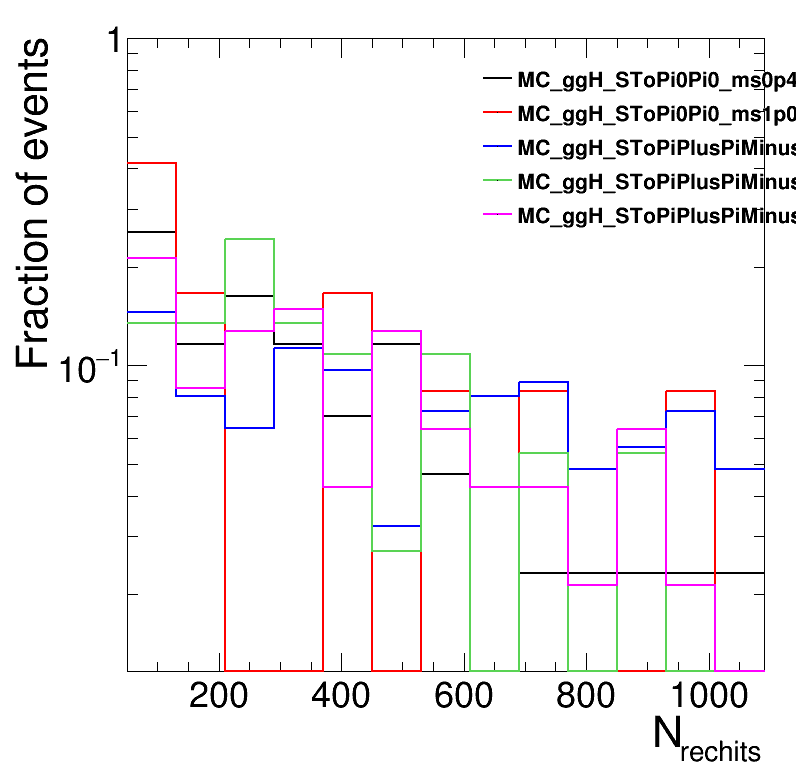

In [20]:
assert(category == 0 or category == 2)




var = [cscClusterSize]

name = ['cscClusterSize']
xaxis = ['N_{rechits}']
bins = [[13,50,1090]]
# name = ['cscRechitClusterTimeWeighted', 'cscRechitClusterTimeSpreadWeightedAll', 'cscRechitClusterJetVetoPt', 'cscRechitClusterGlobalMuonVetoPt', 'cscRechitClusterDphiMet', 'cscRechitClusterMe11Ratio',\
#        'deltaRCluster', 'deltaEta', 'cscRechitClusterEta', 'cscRechitClusterPhi', 'cscRechitClusterAvgStation', 'clusterDphi']

# xaxis = ['cluster time [ns]', 'max cluster time spread [ns]', 'max jet veto p_{T} [GeV]','max muon veto p_{T} [GeV]', 'max #Delta#phi(met, cluster)', 'max N_{ME11 hits}/N_{rechits}',\
#         '#Delta R(cluster1, cluster2)', '#Delta#eta(cluster1, cluster2)', 'cluster #eta', 'cluster #phi', 'cluster average station', '#Delta#phi(cluster1, cluster2)']

# # bins = [ [100,-100,120], [50,0,100], [50,0,500],[50,0,200], [32,0,3.2], [25,0,1.1],[25,0.8,2.5],[30,0,3.2],[35,1,4], [40,0,3.2], [40,0,8], [40,0,5]]

# bins = [ [100,-100,120], [50,0,100], [50,0,500],[50,0,200], [32,0,3.2], [22,0,1.1],[40,0,8], [40,0,5], [25,0.8,2.5],[25,0,3.2],[20,1,4], [25,0,3.2]]

# setlogy = [1,1,1,1,1,1,1,1,1,1,1,1]

for index in range(len(var)):
    if not index == 0:continue
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.6,0.7,0.80,0.92)

#     leg = rt.TLegend(0.5,0.56,0.75,0.92)

    leg.SetTextSize(0.03)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    h = {}

    for i, k in enumerate(weight.keys()):
        if 'TauTau' in k:continue
        if  'dd' in k:continue
        var[index][k]
        h[k] = create_TH1D(np.hstack((var[index][k][:,0], var[index][k][:,1])), axis_title = [xaxis[index], 'Fraction of events'], binning = bins[index])
  
        leg.AddEntry(h[k],k)
#         else: leg.AddEntry(h[k],'m_{S} = ' + k[k.find('m')+1:k.find('ctau')] + ' GeV, c#tau = 1 m')

        h[k].SetLineColor(std_color_list[i])
        if h[k].Integral()>0:h[k].Scale(1./h[k].Integral())
        h[k].SetMaximum(1)
        h[k].Draw('hist same')


    leg.Draw()
    c.SetRightMargin(0.04)

    c.SetLogy()
#     if setlogy[index]: c.SetLogy()
    c.Draw()
    #     plot_path = '/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/double_tag/selection_plots'
    #     c.SaveAs(plot_path+v2+'/csccsc_'+name[index]+".png")
    #     c.SaveAs(plot_path+v2+'/csccsc_'+name[index]+".pdf")
    #     c.SaveAs(plot_path+v2+'/csccsc_'+name[index]+".C")




In [8]:
var[index][k][:,0]

array([ 216, 1037,  432,  309,  796,  432,  481,  891,  345,  269,  140,
        167,  986,  146,  409,  579,  700,  355,  572, 1137,  308,   97],
      dtype=int32)

# DT Cluster Plots

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Info in <TCanvas::Print>: png file /storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/double_tag/selection_plots/v2/v162/dtdt_deltaRCluster.png has been created
Info in <TCanvas::Print>: pdf file /storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/double_tag/selection_plots/v2/v162/dtdt_deltaRCluster.pdf has been created
Info in <TCanvas::SaveSource>: C++ Macro file: /storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/double_tag/selection_plots/v2/v162/dtdt_deltaRCluster.C has been generated


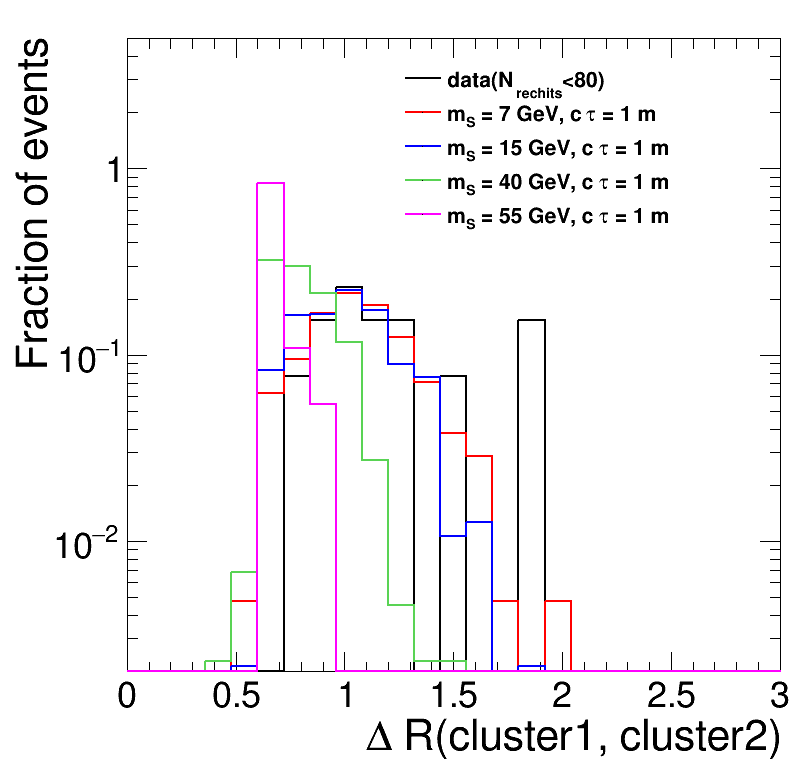

In [145]:
assert(category >= 1)



var = [dtRechitClusterJetVetoPt, dtRechitClusterMuonVetoPt, dtRechitClusterDphi, dtRechitClusterMB1Ratio,\
        deltaRCluster, dtRechitClusterEta, dtRechitClusterPhi, dtRechitClusterAvgStation, clusterDphi]

name = ['dtRechitClusterJetVetoPt', 'dtRechitClusterMuonVetoPt', 'dtRechitClusterDphi_met', 'dtRechitClusterMB1Ratio',\
               'deltaRCluster',  'dtRechitClusterEta', 'dtRechitClusterPhi', 'dtRechitClusterAvgStation', 'clusterDphi']


xaxis = ['max jet veto p_{T} [GeV]', 'max muon veto p_{T} [GeV]', 'max #Delta#phi(met, cluster)', 'max N_{MB1 hits}/N_{rechits}',\
          '#Delta R(cluster1, cluster2)', 'cluster #eta', 'cluster #phi', 'cluster average station', '#Delta#phi(cluster1, cluster2)',]




bins = [ [50,0,500],[40,0,200], [25,0,3.2], [50,0,1.1], [25,0,3], [25,0.0,1.2],[25,0,3.2],[20,1,4], [25,0,3.2]]
setlogy = [1,1,1,1,1,1,0,0,1,1,1,1]



for index in range(len(var)):
    if not index == 4:continue
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.5,0.7,0.75,0.92)
    leg.SetTextSize(0.03)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    h = {}

    for i, k in enumerate(weight.keys()):
#         if not k[-4:] == '1000' and not k == 'data':continue
        if k == 'data':sel_dtcluster =  dtRechitClusterSize[k]<80
        else: sel_dtcluster = dtRechitClusterSize[k]>=80
        if index <= 4:
            if index > 0: sel_dtcluster = np.logical_and(sel_dtcluster, dtRechitClusterJetVetoPt[k]<50)
            if index > 1: sel_dtcluster = np.logical_and(sel_dtcluster, dtRechitClusterMuonVetoPt[k]<10)
            if index > 2: sel_dtcluster = np.logical_and(sel_dtcluster, np.abs(dtRechitClusterDphi[k])<1)
        if category == 1: 
            cond = sel_dtcluster.sum()==2
            if index < 4:h[k] = create_TH1D(np.abs(var[index][k][sel_dtcluster][cond]).max(), axis_title = [xaxis[index], 'Fraction of events'], binning = bins[index])
            elif index == 4 or index == 8:h[k] = create_TH1D(np.abs(var[index][k][cond]), axis_title = [xaxis[index], 'Fraction of events'], binning = bins[index])
            else: h[k] = create_TH1D(np.abs(np.hstack((var[index][k][sel_dtcluster][cond][:,0], var[index][k][sel_dtcluster][cond][:,1]))), axis_title = [xaxis[index], 'Fraction of events'], binning = bins[index])
            h[k].SetLineColor(std_color_list[i])
            if h[k].Integral()>0:h[k].Scale(1./h[k].Integral())

            if index == 4:h[k].SetMaximum(5)
            elif index == 5:h[k].SetMaximum(2)
            else: h[k].SetMaximum(1.5)
            h[k].SetMinimum(0.002)
            h[k].Draw('hist same')
        
            if k == 'data':leg.AddEntry(h[k],k+'(N_{rechits}<80)')
            else: leg.AddEntry(h[k],'m_{S} = ' + k[k.find('m')+1:k.find('ctau')] + ' GeV, c#tau = 1 m')

#         if index == 0:
#             if category == 1: print(k, np.count_nonzero(var[index][k][sel_dtcluster][cond].max()<50)/np.count_nonzero(cond))
#             else: print(k, np.count_nonzero(var[index][k][sel_dtcluster]<50)/np.count_nonzero(sel_dtcluster))
#         elif index == 1:
# #             print(k, np.count_nonzero(var[index][k][sel_dtcluster][cond].max()<10)/np.count_nonzero(cond))
#             print(k, np.count_nonzero(var[index][k][sel_dtcluster]<10)/np.count_nonzero(sel_dtcluster))
#         elif index == 2:print(k, np.count_nonzero(np.abs(var[index][k][sel_dtcluster][cond]).max()<1)/np.count_nonzero(cond))
#         elif index == 3:print(k, np.count_nonzero(np.abs(var[index][k][sel_dtcluster][cond]).max()<0.9)/np.count_nonzero(cond))
    leg.Draw()
#     c.SetRightMargin(0.2)


    # if setlog: 
    c.SetLogy()
    c.Draw()
    plot_path = '/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/double_tag/selection_plots'+v2+'/'
    if not os.path.exists(plot_path):os.makedirs(plot_path)
    c.SaveAs(plot_path+'dtdt_'+name[index]+".png")
    c.SaveAs(plot_path+'dtdt_'+name[index]+".pdf")
    c.SaveAs(plot_path+'dtdt_'+name[index]+".C")




# DT-CSC plots

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Info in <TCanvas::Print>: png file /storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/double_tag/selection_plots/v2/v162/dtcsc_deltaRCluster.png has been created
Info in <TCanvas::Print>: pdf file /storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/double_tag/selection_plots/v2/v162/dtcsc_deltaRCluster.pdf has been created
Info in <TCanvas::SaveSource>: C++ Macro file: /storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/double_tag/selection_plots/v2/v162/dtcsc_deltaRCluster.C has been generated


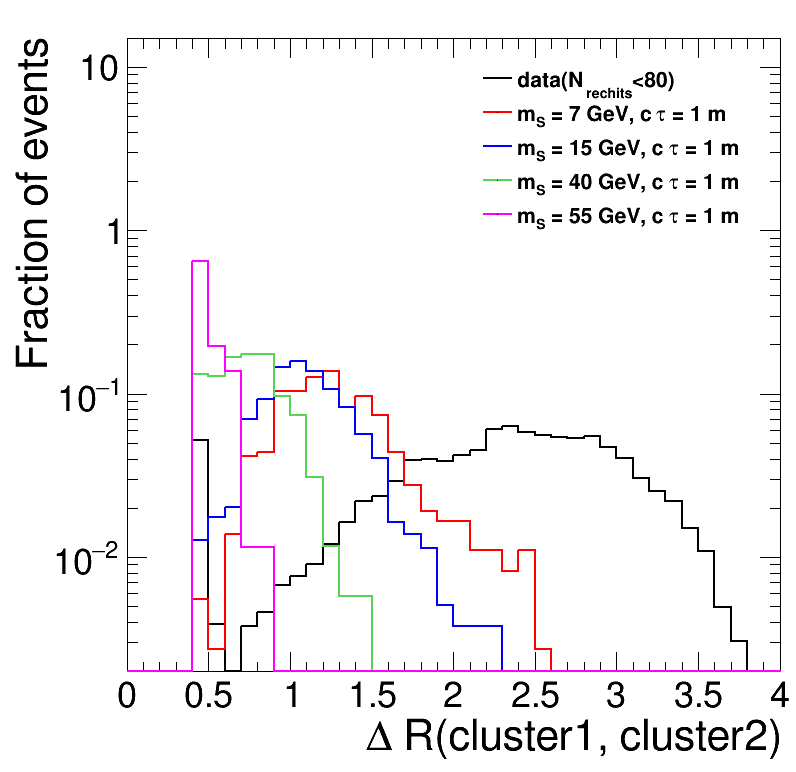

In [152]:
assert(category==2)

var = [clusterDphi, deltaRCluster, deltaEta, dtRechitClusterEta, dtRechitClusterPhi, dtRechitClusterAvgStation,\
      cscRechitClusterEta, cscRechitClusterPhi, cscRechitClusterAvgStation]
name = ['clusterDphi', 'deltaRCluster', 'deltaEta', 'dtRechitClusterEta', 'dtRechitClusterPhi', 'dtRechitClusterAvgStation',\
      'cscRechitClusterEta', 'cscRechitClusterPhi', 'cscRechitClusterAvgStation']
xaxis = ['#Delta#phi(cluster1, cluster2)', '#Delta R(cluster1, cluster2)', '#Delta#eta(cluster1, cluster2)',\
         'cluster #eta', 'cluster #phi', 'cluster average station',\
         'cluster #eta', 'cluster #phi', 'cluster average station']



bins = [  [25,0,3.2], [40,0,4], [40,0,5],[20,0,1.2],[25,0,3.2],[20,1,4],[25,0.8,2.5],[25,0,3.2],[20,1,4]]
setlogy = [1,1,1,1,1,1,1,1,1]



for index in range(len(var)):
    if not index == 1:continue
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.6,0.7,0.8,0.92)
    leg.SetTextSize(0.03)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    h = {}

    for i, k in enumerate(weight.keys()):
#         if not k[-4:] == '1000' and not k == 'data':continue
        if k == 'data':cond =  np.logical_and(cscClusterSize[k]<100, dtRechitClusterSize[k]<80)
        else: cond =  cscClusterSize[k]>=50

        h[k] = create_TH1D(np.abs(var[index][k][np.abs(clusterDphi[k])<2.2]), axis_title = [xaxis[index], 'Fraction of events'], binning = bins[index])

        h[k].SetLineColor(std_color_list[i])
        if h[k].Integral()>0:h[k].Scale(1./h[k].Integral())

        if index == 4:h[k].SetMaximum(5)
        else: h[k].SetMaximum(15)
        h[k].SetMinimum(0.002)
        h[k].Draw('hist same')

        if k == 'data':leg.AddEntry(h[k],k+'(N_{rechits}<80)')
        elif 'Pi' in k:leg.AddEntry(h[k],k)
        else: leg.AddEntry(h[k],'m_{S} = ' + k[k.find('m')+1:k.find('ctau')] + ' GeV, c#tau = 1 m')
#         print(k, np.count_nonzero(np.logical_and(np.abs(clusterDphi[k])<2.2, np.abs(deltaRCluster[k])<2.5))/len(deltaEta[k][np.abs(clusterDphi[k])<2.2]))
#         print(k, np.count_nonzero(np.logical_and(np.abs(clusterDphi[k])<2.2, np.abs(deltaEta[k])<2.5))/len(deltaEta[k][np.abs(clusterDphi[k])<2.2]))
    leg.Draw()
#     c.SetRightMargin(0.2)


    # if setlog: 
    c.SetLogy()
    c.Draw()
    plot_path = '/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/double_tag/selection_plots'+v2+'/'
    if not os.path.exists(plot_path):os.makedirs(plot_path)
    c.SaveAs(plot_path+'dtcsc_'+name[index]+".png")
    c.SaveAs(plot_path+'dtcsc_'+name[index]+".pdf")
    c.SaveAs(plot_path+'dtcsc_'+name[index]+".C")


# DT Noise Hits

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


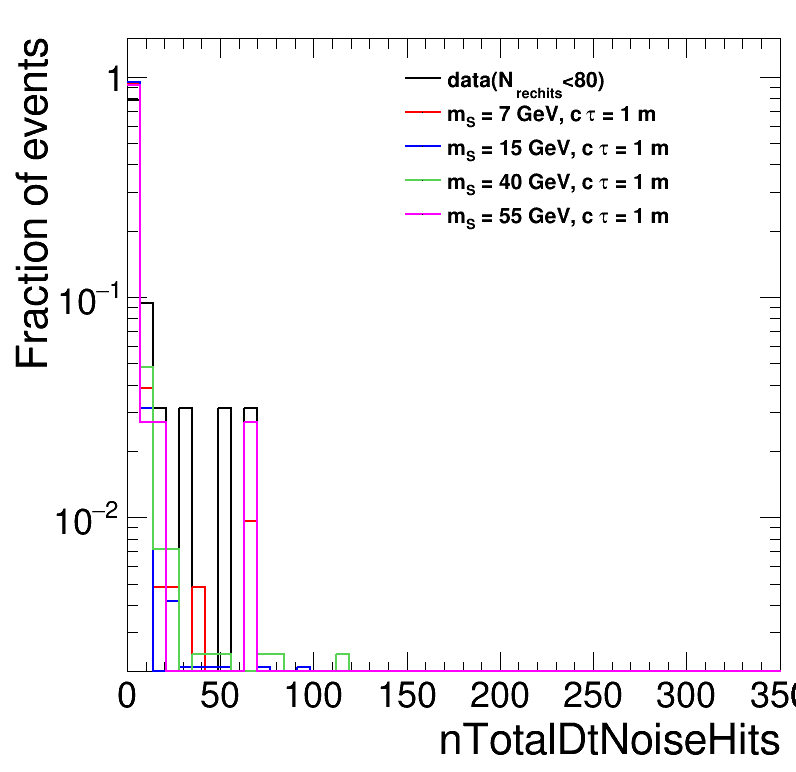

In [29]:
assert(category == 1)


var = [nTotalDtNoiseHits, nDTRechitsNoiseSec8, nDTRechitsNoiseSec9, nDTRechitsNoiseSec10]

name = ['nTotalDtNoiseHits', 'nDTRechitsNoiseSec8', 'nDTRechitsNoiseSec9', 'nDTRechitsNoiseSec10']
xaxis = ['nTotalDtNoiseHits', 'nDTRechitsNoiseSec8', 'nDTRechitsNoiseSec9', 'nDTRechitsNoiseSec10']

bins = [ [50,0,350]]*4


for index in range(len(var)):
    if not index == 0:continue
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.5,0.7,0.75,0.92)
    leg.SetTextSize(0.03)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    h = {}

    for i, k in enumerate(weight.keys()):
        if not k[-4:] == '1000' and not k == 'data':continue
        if k == 'data':sel_dtcluster =  dtClusterSize[k]<80
        else: sel_dtcluster = dtClusterSize[k]>=80
        sel_dtcluster = np.logical_and(sel_dtcluster, dtRechitCluster_match_RPChits_dPhi0p5[k]>=1)
        sel_dtcluster = np.logical_and(sel_dtcluster, dtRechitClusterJetVetoPt[k]<50)
        sel_dtcluster = np.logical_and(sel_dtcluster, np.abs(dtRechitClusterDphi[k])<1.2)
        cond = sel_dtcluster.sum()==2

        h[k] = create_TH1D(np.abs(var[index][k][cond]), axis_title = [xaxis[index], 'Fraction of events'], binning = bins[index])
        #     print(k, np.count_nonzero(var[index][k][sel_csccluster][cond].max()<30)/np.count_nonzero(cond))
        if k == 'data':leg.AddEntry(h[k],k+'(N_{rechits}<80)')
        else: leg.AddEntry(h[k],'m_{S} = ' + k[k.find('m')+1:k.find('ctau')] + ' GeV, c#tau = 1 m')

#         if index == 0:print(k, np.count_nonzero(var[index][k][sel_dtcluster][cond].min()>=1)/np.count_nonzero(cond))
#         elif index == 1:print(k, np.count_nonzero(var[index][k][sel_dtcluster][cond].max()<50)/np.count_nonzero(cond))
#         elif index == 2:print(k, np.count_nonzero(np.abs(var[index][k][sel_dtcluster][cond]).max()<1)/np.count_nonzero(cond))
#         elif index == 3:print(k, np.count_nonzero(np.abs(var[index][k][sel_dtcluster][cond]).max()<0.9)/np.count_nonzero(cond))

        h[k].SetLineColor(std_color_list[i])
        if h[k].Integral()>0:h[k].Scale(1./h[k].Integral())

        if index == 4:h[k].SetMaximum(5)
        else: h[k].SetMaximum(1.5)
        h[k].SetMinimum(0.002)
        h[k].Draw('hist same')
    leg.Draw()
#     c.SetRightMargin(0.2)


    # if setlog: 
    c.SetLogy()
    c.Draw()
    plot_path = '/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/double_tag/selection_plots'
#     c.SaveAs(plot_path+v2+'/'+name[index]+".png")
#     c.SaveAs(plot_path+v2+'/'+name[index]+".pdf")
#     c.SaveAs(plot_path+v2+'/'+name[index]+".C")



